# Exercise 2.1 - Assignment

OK, so we're using the Linnerud dataset to learn something about fitness of middle-aged men. Might even be useful :)

Looking for the relationship between waistline and number of situps. So number of situps is the 'feature' and waistline is the 'target' (not in the usual sense of a target waistline 😁)

## Order of tasks

Let's see if I can write out what we're going to do from memory (no way I'm going to remember the actual code)

1. Load the dataset from the SciKit library, with X and y separated. According to the assignment text, there might be more than one y here, so it could get tricky.
1. Split the dataset into train and test data, 2/3-1/3. Using the sampling tools module of scikit (can't remember the name)
1. Initialise a new LinearRegression model (name might be wrong?)
1. Train the model (`model.fit()`) using the training data
1. Predict y for the test X (`model.predict`, I think?)
1. Plot it using matplotlib (is that the right name?). Plot a line for the predicted y and dots for the actual y

## Ok, let's go

In [2]:
import numpy as np
from sklearn import datasets, linear_model, model_selection
import matplotlib.pyplot as plt

(had to look these up)

### Import the dataset

In [3]:
X, y = datasets.load_linnerud(return_X_y = True)
X.shape()
y.shape()

TypeError: 'tuple' object is not callable

hmm, got that wrong. need to look it up

In [ ]:
print(X.shape)
print(y.shape)

(20, 3)
(20, 3)


I guess `shape` is a property, not a function.

Don't know if the `print` is needed or not.

In [ ]:
X.shape
y.shape

(20, 3)

ah, without `print` it only outputs the last line's output. Veiter.

OK, so both X and y have 3 dimensions, we'll need to reshape both.

According to the [docs](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset),

X = chins, situps, jumps

y = weight, waist, pulse


So we need to get the second one from each.

In [ ]:
X_situps = X[:, np.newaxis, 1]
y_waist = y[:, np.newaxis, 1]

Let's make sure we took the right values

In [ ]:
print(X[0], y[0])
print(X_situps[0], y_waist[0])

[  5. 162.  60.] [191.  36.  50.]
[162.] [36.]


Great, we took the middle one from each.

### Split into training and test data

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_situps, y_waist)

This was from memory (with help from autocomplete), let's see if I got the order of the return values right... yup looks good

### Initialise the model

In [ ]:
model = linear_model.LinearRegression()

### Train the model

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### Predict test data

In [ ]:
y_predict = model.predict(y_test)

### Plot x_test against y_test and y_predict

I need to look this one up 😳

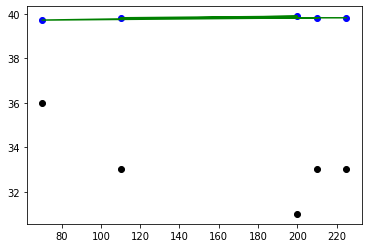

In [ ]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green')
plt.scatter(X_test, y_predict, color='blue')
plt.show()

Something weird here. Why are there only 5 data points? The original dataset had 20, I think.
Also, the results look totally wrong. They're all way above what they should be

In [ ]:
print('orig', X_situps.shape, y_waist.shape) #lol
print('trai', X_train.shape, y_train.shape)
print('test', X_test.shape, y_test.shape)

orig (20, 1) (20, 1)
trai (15, 1) (15, 1)
test (5, 1) (5, 1)


15 train, 5 test.

Ah, maybe I needed to tell it how to split it better. Let's start over

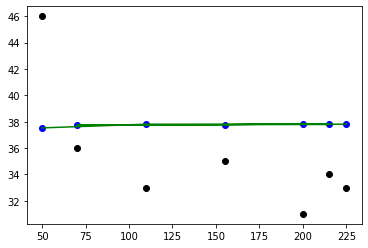

In [ ]:
# Split, this time specifying how much
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_situps, y_waist, test_size=0.33)

# Init, train and predict
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(y_test)

# Plot
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green')
plt.scatter(X_test, y_predict, color='blue')
plt.show()

Ok, now we have 7. But the data is interesting. It's pretty much a straight line! I.e. it makes no difference how many situps you do, your waistline will always be 38 inches. Yay! 😄

Also, it seems like the one outlier changed the average for everything?

This looks very weird, I need to look at the raw data

In [ ]:
print(X_test)
print(y_predict)

[[225.]
 [ 70.]
 [155.]
 [200.]
 [215.]
 [110.]
 [ 50.]]
[[37.80851123]
 [37.74363001]
 [37.76525709]
 [37.85176538]
 [37.78688416]
 [37.80851123]
 [37.52735928]]


(I got curious, is there a way to combine them in NumPy? Looks like hstack might do it)

In [ ]:
np.hstack((X_test, y_predict))

array([[225.        ,  37.80851123],
       [ 70.        ,  37.74363001],
       [155.        ,  37.76525709],
       [200.        ,  37.85176538],
       [215.        ,  37.78688416],
       [110.        ,  37.80851123],
       [ 50.        ,  37.52735928]])

niiiice :)

anyway. Looks like the model is always giving us something in the range 37.7-37.8. Why? I have no idea, the training data surely didn't look like that, did it?

In [ ]:
np.hstack((X_train, y_train))

array([[101.,  38.],
       [ 60.,  37.],
       [210.,  37.],
       [210.,  33.],
       [230.,  32.],
       [120.,  34.],
       [162.,  36.],
       [101.,  36.],
       [110.,  37.],
       [105.,  35.],
       [125.,  34.],
       [101.,  38.],
       [251.,  33.]])

...so no, it didn't. So why does the model think the answer is always 37?

Maybe, if there's no correlation, it just gives up and uses the average?

Let's see if the _training_ data has what looks like a correlation to my eyeballs

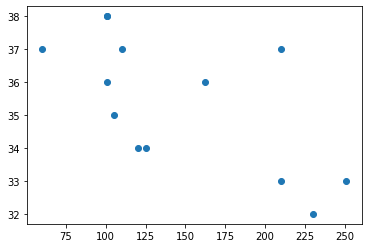

In [ ]:
plt.scatter(X_train, y_train)

Hard to say, it _looks_ like there is a trend - waistline inversely proportional to situps, which is what I'd expect (sadly). If I as a humble human was drawing a line it wouldn't be straight across.

Fun idea, let's ask Excel!
![Excel graph](attachment:Picture1.png)

Excel agrees with me. Not sure why the model doesn't. Maybe we should try again from scratch?

In [18]:
X, y = datasets.load_linnerud(return_X_y=True)

X_situps = X[:, np.newaxis, 1]
y_waist = y[:, np.newaxis, 1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_situps, y_waist, test_size=0.33)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(y_test)

print(np.hstack((X_test, y_predict)))

[[105.          40.90121617]
 [215.          40.94564911]
 [110.          40.99008206]
 [210.          40.99008206]
 [ 60.          40.81235027]
 [162.          40.85678322]
 [ 70.          40.85678322]]


Bizarre. Same again, but a different number this time.

I mean, a different number is not bizarre because it splits train and test randomly. But why does it always think everyone is the same?

I really really hope it's not because of some stupid mistake I made...

About to give up on this, but just for fun let's see if it gets my waistline correct:

In [20]:
model.predict([[0]])

array([[42.45636929]])

...no comment 😉